# 21 时间测量中随机误差的分布规律

## 初始化部分（不用阅读 直接跳过）


In [22]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import os
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] # 用黑体显示中文
def toMarkdown(x,e): # 将数字转换为Markdown格式的科学计数法 精度格式为e
    s=format(x,e)
    l=s.split('e')
    l[1]=str(int(l[1]))
    if(l[1]== '0'):
        return l[0]
    return l[0]+'\\times10^{'+l[1]+'}'

accuracy=".2e"

## 读取部分

请将你的数据放在同目录下的`data.txt`文件中，格式如下：
每一行一个数据(应该有200行)，例如：
```
2.94
2.82
3.06
2.94
...
2.96
3.18 
3.03
```
输出为10个一行的表格

In [23]:

f=open('data.txt','r')
a=[]
for line in f:
   a.append(float(line))
f.close()
n=len(a)
for i in range(n):
    print(format(a[i],".2f"),end=' ')
    if(i%10==9):
        print()

2.94 2.82 3.06 2.94 2.93 3.06 3.10 3.00 3.06 3.18 
2.97 3.06 3.13 3.00 3.03 3.22 3.25 3.06 3.18 3.25 
2.93 3.22 3.06 3.00 3.25 3.07 3.12 3.18 3.06 3.25 
3.09 2.93 3.00 2.97 2.97 3.22 3.06 3.03 3.16 2.91 
2.97 2.94 2.97 3.03 2.88 3.16 3.12 3.10 3.03 3.19 
3.12 2.90 3.00 3.15 3.10 3.12 2.97 3.28 3.28 3.12 
3.00 2.85 2.97 3.22 3.25 3.12 3.16 3.16 2.88 2.92 
3.18 3.12 2.97 2.89 2.79 2.94 3.22 2.81 3.10 2.97 
3.03 2.97 3.25 2.97 2.90 3.06 3.13 3.09 3.23 3.16 
3.28 3.12 2.89 3.16 3.09 3.18 3.09 3.10 3.18 2.93 
3.04 3.15 3.10 3.00 3.16 3.03 2.94 2.96 2.90 3.10 
3.16 3.00 3.06 3.06 3.19 3.03 3.10 2.94 3.03 3.06 
2.91 2.97 3.07 3.24 3.03 3.12 3.22 3.25 3.00 3.16 
3.00 3.22 3.13 3.22 3.43 2.99 2.88 3.23 3.19 3.19 
2.91 2.76 3.03 3.10 3.13 3.28 3.13 3.00 3.37 3.16 
3.25 3.00 3.16 2.91 3.30 2.88 3.31 3.03 3.25 3.03 
3.13 3.06 3.19 3.09 3.28 3.06 3.28 3.25 2.97 3.28 
3.03 3.18 3.03 3.25 3.25 3.32 3.13 3.24 3.47 3.03 
3.03 3.22 3.31 2.94 3.16 3.48 2.87 3.04 3.28 3.22 
3.06 3.35 3.22 3.00 3.37 3.25 3

## 基础数据处理
计算平均值、标准差等统计量，并输出结果。


In [24]:
a_bar=round(np.mean(a),2)
a_max=round(max(a),2)
a_min=round(min(a),2)
a_std=round(np.std(a,ddof=1),4)
a_var=round(np.var(a,ddof=1),4)
R=round(a_max-a_min,2)
print("平均值: ",a_bar)
print("最大值: ",a_max)
print("最小值: ",a_min)
print("标准差: ",a_std)
print("方差: ",a_var)
print("极差: ",R)

平均值:  3.09
最大值:  3.48
最小值:  2.76
标准差:  0.1352
方差:  0.0183
极差:  0.72


## 计算分段 统计频率

计算分段统计频率，输出分段区间、频数、频率、频率密度和概率密度函数值。

$$ P(x,\bar x,\sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\bar x)^2}{2\sigma^2}} $$

```
(Markdown)
$$ P(x,\bar x,\sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\bar x)^2}{2\sigma^2}} $$
```

调节下面的`N`值来改变分段数目，默认是14段。



In [25]:
def P(x,x_bar,sigma):
    return 1/(math.sqrt(2*math.pi)*sigma)*math.exp(-(x-x_bar)**2/(2*(sigma**2)))

N=12
b=[0]*N
r=R/N# 每段的范围
b[0]=a_min+r/2
print("[",format(b[0]-r/2,'.2f'),",",format(b[0]+r/2,'.2f'),'],',end='')
for i in range(1,N):
    b[i]=b[i-1]+r
    print("(",format(b[i]-r/2,'.2f'),",",format(b[i]+r/2,'.2f'),'],',end='')

print(f"\n一共{N}段，每段长度为{r:.2f}")
cnt=[0]*N
for i in range(n):
    for j in range(N):
        if b[j]-r/2<a[i]<=b[j]+r/2:
            cnt[j]+=1
        if b[j]-r/2==a[i] and j==0:
            cnt[j]+=1
            
print("普通格式：")
print("区间  频数  频率 频率密度 概率密度函数值")
for i in range(N):
    print("(",format(b[i]-r/2,'.2f'),",",format(b[i]+r/2,'.2f'), #范围
          '] ',cnt[i],  #频数
          ' ',format(cnt[i]/n,'.2f'),  #频率
          ' ',format(cnt[i]/(n*r),'.2f'), #频率密度
          ' ',format(P(b[i],a_bar,a_std),'.2f')) #概率密度函数值     
print("Markdown格式：")
print("|区间$|$频数$|$频率$|$频率密度$|$概率密度函数值$|")
print("|:--:|:--:|:--:|:--:|:--:|")
for i in range(N):
    print("|$(",format(b[i]-r/2,'.2f'),",",format(b[i]+r/2,'.2f'), #范围
          ']$|$',cnt[i],  #频数
          '$|$',format(cnt[i]/n,'.2f'),  #频率
          '$|$',format(cnt[i]/(n*r),'.2f'), #频率密度
          '$|$',format(P(b[i],a_bar,a_std),'.2f'),'$|') #概率密度函数值



[ 2.76 , 2.82 ],( 2.82 , 2.88 ],( 2.88 , 2.94 ],( 2.94 , 3.00 ],( 3.00 , 3.06 ],( 3.06 , 3.12 ],( 3.12 , 3.18 ],( 3.18 , 3.24 ],( 3.24 , 3.30 ],( 3.30 , 3.36 ],( 3.36 , 3.42 ],( 3.42 , 3.48 ],
一共12段，每段长度为0.06
普通格式：
区间  频数  频率 频率密度 概率密度函数值
( 2.76 , 2.82 ]  3   0.01   0.25   0.25
( 2.82 , 2.88 ]  2   0.01   0.17   0.61
( 2.88 , 2.94 ]  14   0.07   1.17   1.22
( 2.94 , 3.00 ]  16   0.08   1.33   1.99
( 3.00 , 3.06 ]  19   0.10   1.58   2.67
( 3.06 , 3.12 ]  16   0.08   1.33   2.95
( 3.12 , 3.18 ]  21   0.10   1.75   2.67
( 3.18 , 3.24 ]  18   0.09   1.50   1.99
( 3.24 , 3.30 ]  22   0.11   1.83   1.22
( 3.30 , 3.36 ]  5   0.03   0.42   0.61
( 3.36 , 3.42 ]  2   0.01   0.17   0.25
( 3.42 , 3.48 ]  3   0.01   0.25   0.09
Markdown格式：
|区间$|$频数$|$频率$|$频率密度$|$概率密度函数值$|
|:--:|:--:|:--:|:--:|:--:|
|$( 2.76 , 2.82 ]$|$ 3 $|$ 0.01 $|$ 0.25 $|$ 0.25 $|
|$( 2.82 , 2.88 ]$|$ 2 $|$ 0.01 $|$ 0.17 $|$ 0.61 $|
|$( 2.88 , 2.94 ]$|$ 14 $|$ 0.07 $|$ 1.17 $|$ 1.22 $|
|$( 2.94 , 3.00 ]$|$ 16 $|$ 0.08 $|$ 1.33 

## 统计σ分布
输出结果 1σ、2σ、3σ的分布情况。
A类不确定度

In [26]:
sigm=[0]*4
for i in range(n):
    for j in range(1,4):
        if(abs(a[i]-a_bar)<=j*a_std):
            sigm[j]+=1
print("σ分布：")
print("σ 频数 频率")
for i in range(1,4):
    print(i,sigm[i],sigm[i]/n)
print('A类不确定度:',a_std*1.96/(n**0.5))

σ分布：
σ 频数 频率
1 133 0.665
2 192 0.96
3 200 1.0
A类不确定度: 0.018737764016018555


## 画图




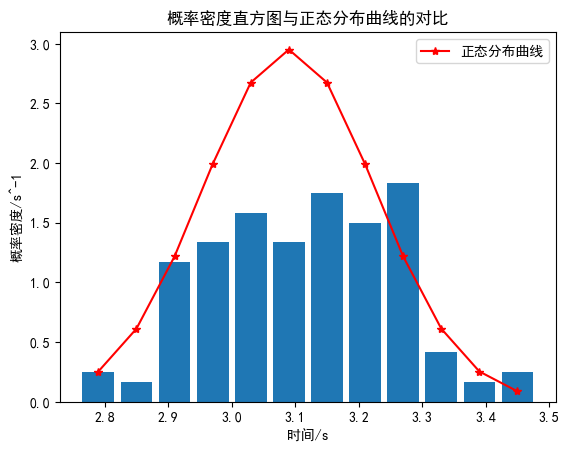

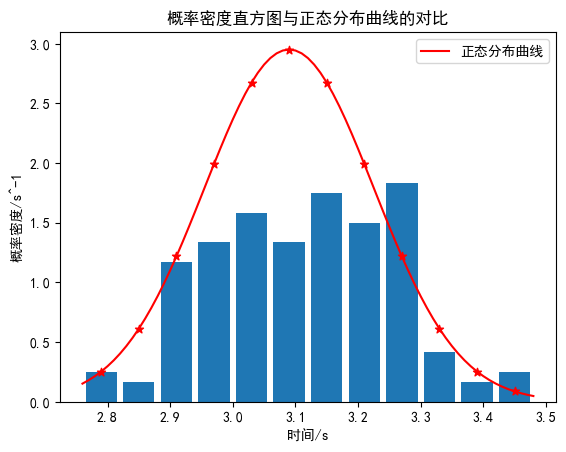

In [27]:
#折线图
p=[P(b[i],a_bar,a_std) for i in range(N)]
freq=[cnt[i]/(n*r) for i in range(N)]
plt.bar(b,freq,width=0.05)
plt.plot(b,p,color='red',label='正态分布曲线',marker='*')
plt.xlabel('时间/s')
plt.ylabel('概率密度/s^-1')
plt.title('概率密度直方图与正态分布曲线的对比')
plt.legend()
plt.show()
#曲线图
plt.bar(b,freq,width=0.05)
plt.scatter(b,p,color='red',marker='*')
x=np.arange(a_min,a_max,0.01)
y=[P(x,a_bar,a_std) for x in x]
plt.plot(x,y, color='red',label='正态分布曲线')
plt.xlabel('时间/s')
plt.ylabel('概率密度/s^-1')
plt.title('概率密度直方图与正态分布曲线的对比')
plt.legend()
plt.show()